In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

## Loading of the data

In [2]:
data = pd.read_csv('faultsFile.csv')
df = pd.DataFrame(data)

## Getting to know the data

In [3]:
print("Number of instances: ", data.shape[0])
print("Number of features: ", data.shape[1])

Number of instances:  1941
Number of features:  34


In [4]:
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int6

In [5]:
statistics = data.describe()
print("Statistical Summary:")
print(statistics)

Statistical Summary:
         X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879      

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [7]:
#Getting to know are there any Non-filled-values
data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
# Check for duplicate values
duplicates = data.duplicated()

print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Length: 1941, dtype: bool


## Identifying the target/fault features

In [9]:
fault_features = df.columns[-7:]
print("Names of fault features: ", fault_features)

Names of fault features:  Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')


In [10]:
target_features = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']
target_counts = data[target_features].sum()
print("Target Variable:")
print(target_counts)

Target Variable:
Pastry          158
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64


## Understanding of data through histogram plots

In [11]:
data.hist(figsize=(100, 100))
plt.show()

## Splitting of the data 

In [12]:
#Seperation of independent variables and target variables

X = data.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], axis = 1)
y = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']]

## Splitting the data into training and test sets

In [13]:
#Train and Test data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('shape Xtrain',X_train.shape)
print('shape yTrain',y_train.shape)

shape Xtrain (1552, 27)
shape yTrain (1552, 7)


## Preprocessing the X_train and X_test data

In [14]:
#Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[-0.82467683, -0.93023233, -0.79922764, -0.79924549, -0.33725455,
        -0.26742276, -0.14471454, -0.37527942,  1.26915021,  0.70823915,
        -0.64905275, -0.8079741 ,  0.8079741 , -0.70354311, -0.21353517,
        -0.29110878, -0.19443448,  0.56454472, -0.21799101, -0.17932056,
        -1.20076233, -0.27627982, -0.28108068, -0.27770843,  0.01251345,
         0.24593463, -0.21381651],
       [ 1.04427617,  1.01283401,  0.07289877,  0.07286897, -0.34787979,
        -0.32283286, -0.16794333, -0.38983421,  0.95262237,  1.09790339,
        -0.67680461, -0.8079741 ,  0.8079741 , -0.51954828, -0.21264642,
        -0.29167319, -0.19515951, -0.16166239, -0.21633287, -0.17831511,
        -1.20076233, -0.27710426, -0.2817383 ,  1.55814802,  0.01180071,
         0.24581619, -0.21523728],
       [-1.04307568, -0.83500385,  0.59732733,  0.59732468,  0.80276033,
         0.4960053 ,  0.10235522,  0.84206203, -1.3580309 , -0.23808829,
        -0.69068053, -0.8079741 ,  0.8079741 , -0.7035

## Linear Regression

In [16]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
#The coefficient of determination of training dataset
print("The training set r_sq:", lm.score(X_train, y_train))

The training set r_sq: 0.2486121575419165


In [18]:
#Prediction on training dataset
ytrain_pred = lm.predict(X_train)

In [19]:
#The MSE of training dataset
print("The MSE is:", mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.0794380997992412


In [20]:
#The coefficient of determination of test dataset
print("The test set r_sq:", lm.score(X_test, y_test))

The test set r_sq: 0.22898580533718071


In [21]:
#Prediction on test dataset
ytest_pred = lm.predict(X_test)

In [22]:
#The MSE of training dataset
print("The MSE is:", mean_squared_error(y_test, ytest_pred))

The MSE is: 0.07712040896164465


## Decision Tree Classification

In [23]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
theTree=tree.export_text(clf_dt)
print(theTree)

|--- feature_4 <= 0.25
|   |--- feature_4 <= -0.35
|   |   |--- feature_13 <= -0.06
|   |   |   |--- feature_5 <= -0.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  -0.34
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  -0.06
|   |   |   |--- feature_3 <= -0.72
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.72
|   |   |   |   |--- class: 0
|   |--- feature_4 >  -0.35
|   |   |--- feature_11 <= 0.21
|   |   |   |--- feature_19 <= -0.18
|   |   |   |   |--- feature_7 <= -0.01
|   |   |   |   |   |--- feature_17 <= -0.16
|   |   |   |   |   |   |--- feature_26 <= -0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_26 >  -0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_17 >  -0.16
|   |   |   |   |   |   |--- feature_2 <= 1.01
|   |   |   |   |   |   |   |--- feature_9 <= -0.10
|   |   |   |   |   |   |   |   |--- feature_17 <= -0.16
|   |   |   |   |   |   |   |   |   |--- class: 1
|   

In [25]:
#The coefficient of determination of training data set
print("The training set r_sq:", clf_dt.score(X_train, y_train))

The training set r_sq: 1.0


In [26]:
#Prediction on training dataset
ytrain_pred = clf_dt.predict(X_train)

In [27]:
#The MSE of training data set
print("The MSE is:", mean_squared_error(y_train, ytrain_pred))

The MSE is: 0.0


In [28]:
#The coefficient of determination of test data set
print("The test set r_sq:", clf_dt.score(X_test, y_test))

The test set r_sq: 0.7017994858611826


In [29]:
#Prediction on testing dataset
ytest_pred = clf_dt.predict(X_test)

In [30]:
#The MSE of test data set
print("The MSE is:", mean_squared_error(y_test, ytest_pred))

The MSE is: 0.085200146896805


In [31]:
print(classification_report(y_test, ytest_pred,target_names=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']))

              precision    recall  f1-score   support

      Pastry       0.43      0.41      0.42        29
   Z_Scratch       0.95      0.95      0.95        41
    K_Scatch       0.93      0.90      0.91        83
      Stains       0.86      0.92      0.89        13
   Dirtiness       0.60      0.75      0.67         8
       Bumps       0.51      0.56      0.53        72
Other_Faults       0.65      0.62      0.64       143

   micro avg       0.70      0.70      0.70       389
   macro avg       0.70      0.73      0.72       389
weighted avg       0.71      0.70      0.70       389
 samples avg       0.70      0.70      0.70       389



Text(0.5, 0.98, 'Decision tree, Steel Faults data')

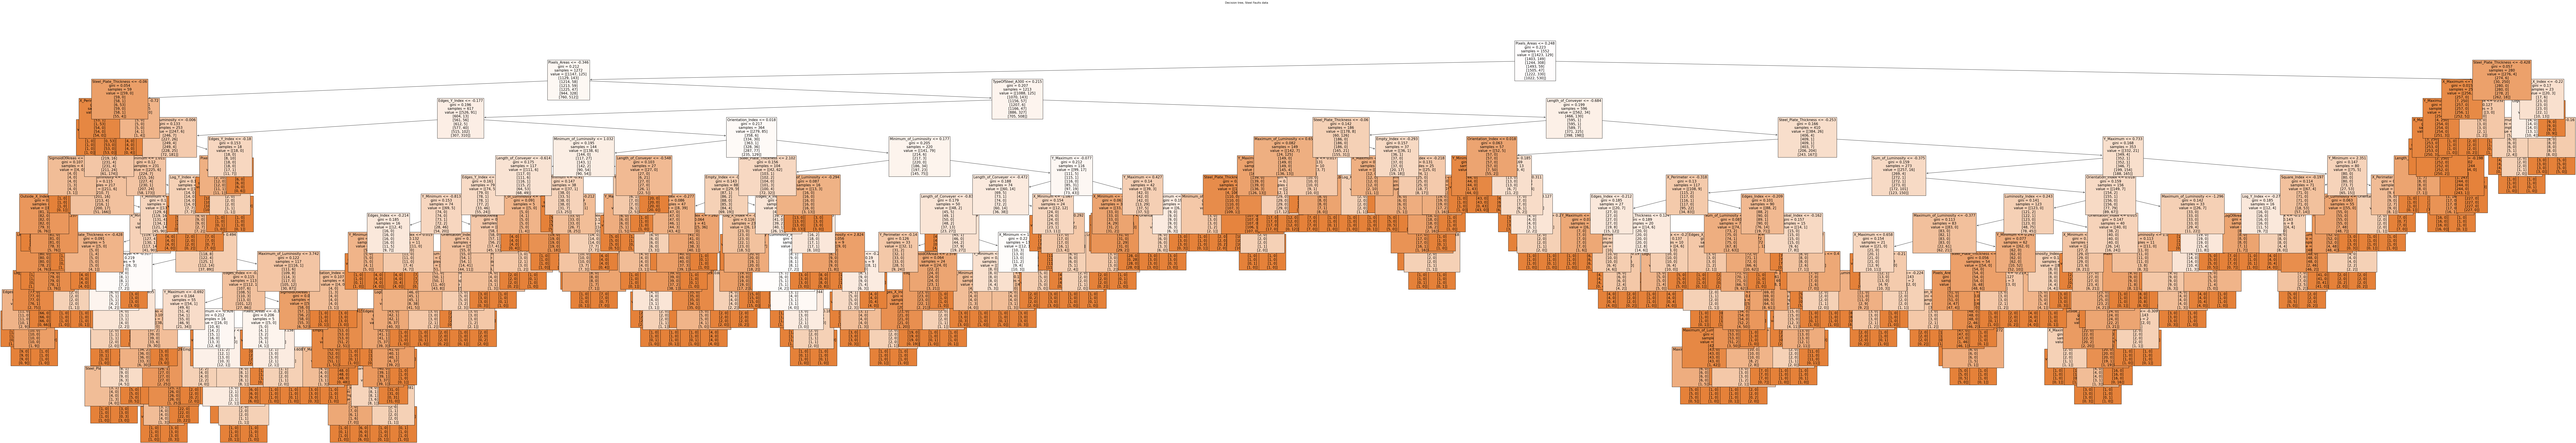

In [32]:
fig=plt.figure(figsize = (200,30))
tree.plot_tree(clf_dt,feature_names = data.columns, class_names=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], filled=True, fontsize = 15)
fig.suptitle("Decision tree, Steel Faults data" ) 

## Support Vector Machine

Splitting of data set

In [33]:
X1 = data.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], axis = 1)
y1 = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults']]

y1_combined = y1.idxmax(axis = 1) #The SVM takes only 1d Array

Splitting of training and test data sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1_combined, test_size = 0.2, random_state = 42)

Preprocessing the X_train and X_test data

In [35]:
#Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Because we have seven classes of target/fault features in our case, the SVM model will generate seven binary classifiers. Each binary classifier will be trained to differentiate between one class (the positive class) and the remaining six classes (the negative class). SVM can handle multi-class classification issues using this one-vs-rest (OvR) technique. Using the independent features as input, each binary classifier is trained separately to tackle its specific classification problem. The SVM model integrates the results of all binary classifiers during prediction to produce the final class assignment for a given input.

SVM can effectively handle cases with more than two classes in the target variable by decomposing the multi-class problem into numerous binary classification problems.

In [36]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')  # OvR strategy
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
# Prediction of the labels for the test set
y_pred = clf.predict(X_test)

In [38]:
# Evaluation of the model's performance
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

       Bumps       0.44      0.64      0.52        72
   Dirtiness       1.00      0.00      0.00         8
    K_Scatch       0.94      0.90      0.92        83
Other_Faults       0.61      0.62      0.61       143
      Pastry       0.50      0.14      0.22        29
      Stains       0.60      0.46      0.52        13
   Z_Scratch       0.81      0.85      0.83        41

    accuracy                           0.65       389
   macro avg       0.70      0.52      0.52       389
weighted avg       0.67      0.65      0.64       389



In [39]:
#Casualy testing wether it can predict which fault feature it is according to an array of independent variablesof my own.

new_data = np.array([[1.78644571e+00,  1.79492328e+00,  5.11858325e-02,
         5.11784739e-02, -3.01348570e-01, -2.42796051e-01,
        -8.55867379e-02, -3.40686309e-01,  3.03883047e-03,
        -1.82421974e-01,  1.68210301e+00, -7.07974103e-01,
         8.07974103e-01,  2.16431029e-01, -2.13589077e-01,
        -2.93297712e-01, -0.999472411e-01, -1.11655787e-01,
        -2.20218523e-01, -1.77174701e-01,  0.76810842e-01,
         2.83311129e+00, -2.81521546e-01, -2.76224062e-01,
         2.07918541e-02,  2.42080056e-01, -2.10807292e-01]])
predicted_class = clf.predict(new_data)
print("Predicted Class:", predicted_class)

Predicted Class: ['Other_Faults']


## Summary

We loaded the given 'faultsFile.csv'data set and utilized various functions to understand the data. We looked for any non-filled/null values throughout the cleaning process and discovered that there are none. Then we checked for duplicate values and discovered that there were no duplicate entries. Later, we divide the data set into independent and target/fault features, and then into training and testing sets.

First, we applied Linear Regression Classification and discovered an R2(R_Square) of 22%, indicating that this module is less accurate in predicting future input. We then used Decision Tree Classification. We learn that it has a 71% accuracy in predicting the defect aspects of future input. Finally, we used Support Vector Classification, which has a prediction accuracy of 65%.
